Assigment 1

I want you to use 3 different feature scale methods separately. write a function for this and return the X_scaled variable. Compare the mean squared error results from the 3 methods and report your results. It would be better if you change the code completely into functions (function for cost calculation etc.).


Mean Squared Error: 461.8905818934908


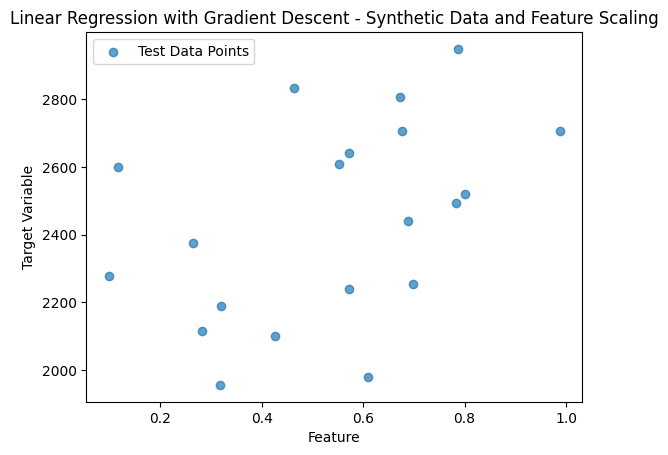

Learned Coefficients (Weights):
[[664.90298743]
 [947.21978952]]
Bias (Intercept): 1599.9096765117727
_______________________________________


Mean Squared Error: 0.8110670689820058


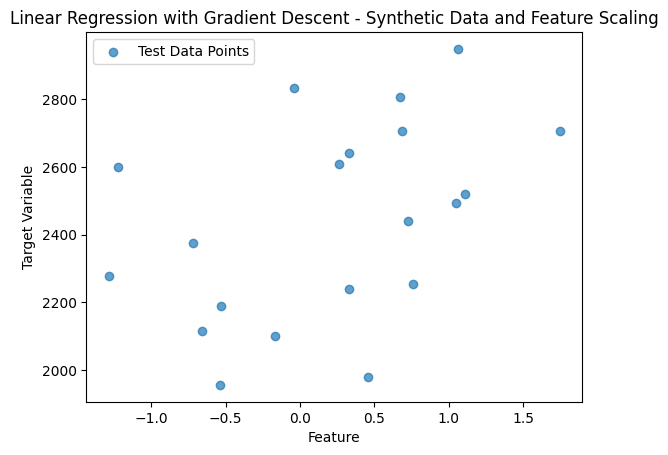

Learned Coefficients (Weights):
[[172.75879895]
 [276.64937111]]
Bias (Intercept): 2411.492747754207
_______________________________________


Mean Squared Error: 0.8110670689820058


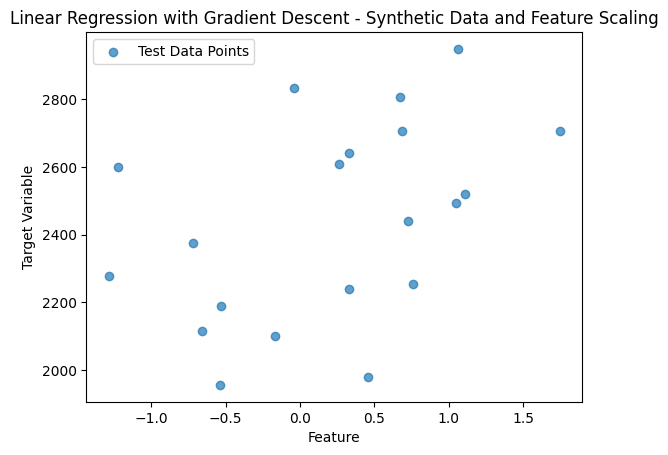

Learned Coefficients (Weights):
[[172.75879895]
 [276.64937111]]
Bias (Intercept): 2411.492747754207
_______________________________________


max_min_mse: 461.8905818934908
mean_norm_mse: 0.8110670689820058
z_score_mse: 0.8110670689820058


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def max_min_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_scaled = (X - min_vals) / (max_vals - min_vals)
    return X_scaled

def mean_normalization(X):
    mean_vals = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean_vals) / std_dev
    return X_scaled

def z_score_scaling(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def calculate_mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def func(X_train, X_test, y_train, y_test):
    # Rest of your code for linear regression, gradient descent, and evaluation
    # Initialize the weights and bias terms closer to zero
    n_features = X_train.shape[1]
    w = np.zeros((n_features, 1))
    b = 0

    # Use a smaller learning rate for smoother convergence
    alpha = 0.01  # Learning rate
    num_iterations = 1000

    # Implement gradient descent
    m = len(X_train)  # Number of training data points

    for iteration in range(num_iterations):
        # Compute predictions
        y_pred = np.dot(X_train, w) + b

        # Compute gradients
        w_gradient = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
        b_gradient = (1 / m) * np.sum(y_pred - y_train)

        # Update weights and bias
        w -= alpha * w_gradient.reshape(-1, 1)  # Reshape to match the shape of w
        b -= alpha * b_gradient

    # Make predictions on the test data
    y_pred = np.dot(X_test, w) + b

    # Evaluate the model using Mean Squared Error (MSE)
    mse = calculate_mse(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Plot one feature against y_test
    plt.scatter(X_test[:, 0], y_test, label='Test Data Points', alpha=0.7)
    plt.xlabel('Feature')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.title('Linear Regression with Gradient Descent - Synthetic Data and Feature Scaling')
    plt.show()

    # Print the learned coefficients
    print("Learned Coefficients (Weights):")
    print(w)
    print("Bias (Intercept):", b)
    print("_______________________________________\n\n")
    return mse

# Generate synthetic data with different feature scales
np.random.seed(0)
temperature = 20 + 20 * np.random.rand(100, 1)
ice_cream_sales = 200 * np.random.rand(100, 1)
X = np.hstack((temperature, ice_cream_sales))
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)


# Choose the feature scaling method (uncomment one of these lines)
X_scaled = [max_min_scaling(X), mean_normalization(X), z_score_scaling(X)]
mses = []
for i in X_scaled:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(i, daily_profit, test_size=0.2, random_state=42)
    mses.append(func(X_train, X_test, y_train, y_test))

print("max_min_mse:", mses[0])
print("mean_norm_mse:", mses[1])
print("z_score_mse:", mses[2])
